In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Read in the data
df = pd.read_csv('assets/updated_house_df.csv')
df.head()

,land_sale_price,total_sale_price,deed_date,assessed_building_value,story_height,heated_area,utilities,bath,type_and_use,physical_zip_code,...,covid_cases,is_covid,lumber_price,metals_price,build_price,int_rate,manufactured_house_number,hai,wake_supply_index,wake_demand_index
0,0.0,395000.0,2021-03-01,101436.0,1.0,1212,ALL,2.0,1.0,27608,...,74599.0,1,365.8,292.2,198.9,-0.869249,95.9,152.0,88.585923,55.802156
1,0.0,395000.0,2021-03-01,101436.0,1.0,1212,ALL,2.0,1.0,27608,...,74696.0,1,365.8,292.2,198.9,-0.869249,95.9,152.0,88.585923,55.802156
2,0.0,395000.0,2021-03-01,101436.0,1.0,1212,ALL,2.0,1.0,27608,...,74957.0,1,365.8,292.2,198.9,-0.869249,95.9,152.0,88.585923,55.802156
3,0.0,395000.0,2021-03-01,101436.0,1.0,1212,ALL,2.0,1.0,27608,...,75183.0,1,365.8,292.2,198.9,-0.869249,95.9,152.0,88.585923,55.802156
4,0.0,395000.0,2021-03-01,101436.0,1.0,1212,ALL,2.0,1.0,27608,...,75405.0,1,365.8,292.2,198.9,-0.869249,95.9,152.0,88.585923,55.802156


In [36]:
int_rate_df = pd.read_csv('assets/us_int_rate.csv')
int_rate_df.drop(columns=['Unnamed: 0'], inplace=True)
int_rate_df.rename(columns={'year':'date'},inplace=True)

int_rate_df.head()

,int_rate,date
0,6.813424,2000-01-01
1,4.565848,2001-01-01
2,3.068643,2002-01-01
3,2.107311,2003-01-01
4,1.612311,2004-01-01


In [26]:
year_list = ['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']

In [50]:
# Create a new dataframe with the data we want to plot
df['year'] = df['deed_date'].apply(lambda x: x.split('-')[0])
int_rate_df['year'] = int_rate_df['date'].apply(lambda x: x.split('-')[0])

house_mean_price_dict = {}
house_median_price_dict = {}
building_mean_price_dict = {}
building_median_price_dict = {}
land_mean_price_dict = {}
land_median_price_dict = {}
interest_rate_dict = {}
for year in year_list:
    house_mean_price_dict[year] = 0
    house_mean_price_dict[year] = (df[df['year'] == year]['total_sale_price'].mean())
    house_median_price_dict[year] = 0
    house_median_price_dict[year] = (df[df['year'] == year]['total_sale_price'].median())
    building_mean_price_dict[year] = 0
    building_mean_price_dict[year] = (df[df['year'] == year]['assessed_building_value'].mean())
    building_median_price_dict[year] = 0
    building_median_price_dict[year] = (df[df['year'] == year]['assessed_building_value'].median())
    land_mean_price_dict[year] = 0
    land_mean_price_dict[year] = (df[df['year'] == year]['land_sale_price'].mean())
    land_median_price_dict[year] = 0
    land_median_price_dict[year] = (df[df['year'] == year]['land_sale_price'].median())
    interest_rate_dict[year] = 0
    interest_rate_dict[year] = (int_rate_df[int_rate_df['year'] == year]['int_rate'].values[0])


price_summary = pd.DataFrame(house_mean_price_dict.values(), house_mean_price_dict.keys(), columns=['sale_price_mean'])
price_summary['sale_price_median'] = house_median_price_dict.values()
price_summary['building_mean'] = building_mean_price_dict.values()
price_summary['building_median'] = building_median_price_dict.values()
price_summary['land_mean'] = land_mean_price_dict.values()
price_summary['land_median'] = land_median_price_dict.values()
price_summary['interest_rate'] = interest_rate_dict.values()
price_summary.reset_index(inplace=True)
price_summary.rename(columns={'index':'year'}, inplace=True)
price_summary.sort_values('year', inplace=True)
price_summary.reset_index(drop=True, inplace=True)

price_summary.head()

,year,sale_price_mean,sale_price_median,building_mean,building_median,land_mean,land_median,interest_rate
0,2000,196779.085498,168500.0,233086.860660,208407.0,15371.262175,0.0,6.813424
1,2001,198302.046853,167000.0,247600.776621,202949.0,14835.434690,0.0,4.565848
2,2002,203118.148346,167500.0,231317.369264,203191.0,15193.880683,0.0,3.068643
3,2003,293418.037965,176000.0,233793.021617,208503.0,15661.790372,0.0,2.107311
4,2004,223392.919597,184000.0,239428.187660,212826.5,17528.325607,0.0,1.612311


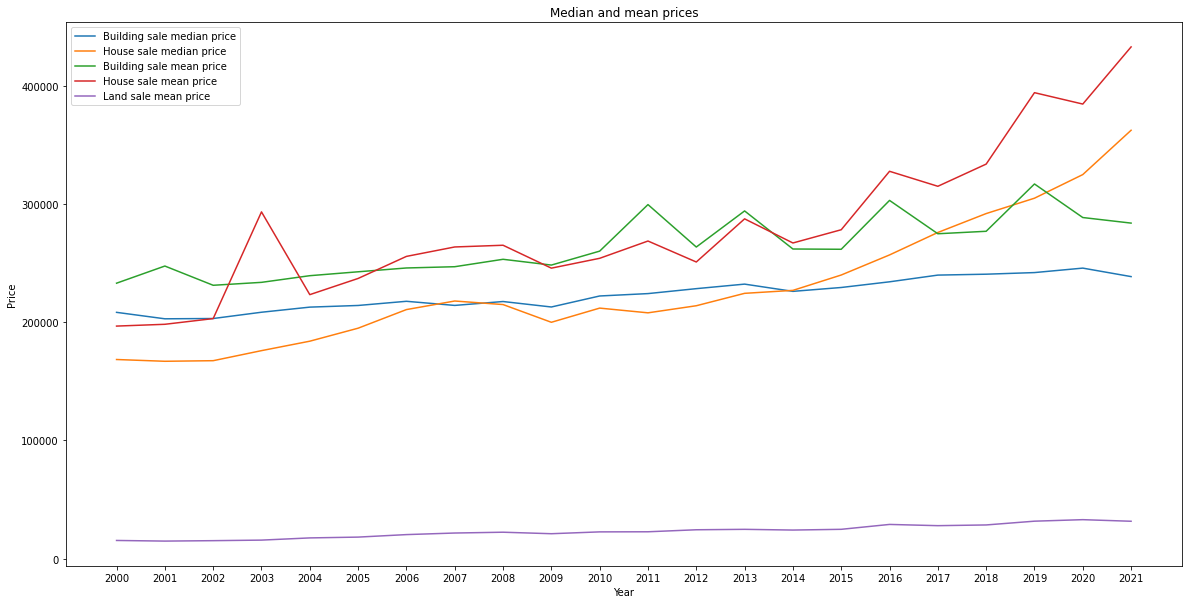

In [52]:
# Create a line chart of the mean and median house prices
plt.figure(figsize=(20,10))
plt.plot(price_summary['year'], price_summary['building_median'], label='Building sale median price')
plt.plot(price_summary['year'], price_summary['sale_price_median'], label='House sale median price')
plt.plot(price_summary['year'], price_summary['building_mean'], label='Building sale mean price')
plt.plot(price_summary['year'], price_summary['sale_price_mean'], label='House sale mean price')
plt.plot(price_summary['year'], price_summary['land_mean'], label='Land sale mean price')

plt.legend()
plt.title('Median and mean prices')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

<AxesSubplot:>

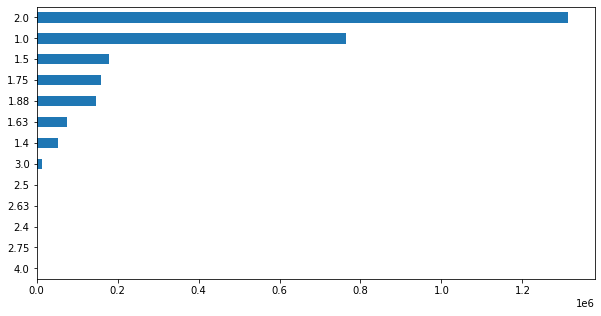

In [7]:
df['story_height'].value_counts().sort_values().plot(kind='barh', figsize=(10,5))

<AxesSubplot:>

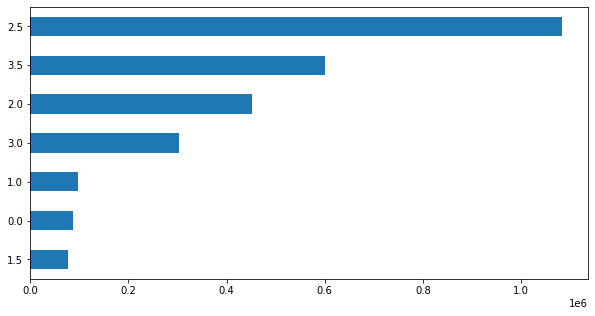

In [8]:
df['bath'].value_counts().sort_values().plot(kind='barh', figsize=(10,5))

<AxesSubplot:>

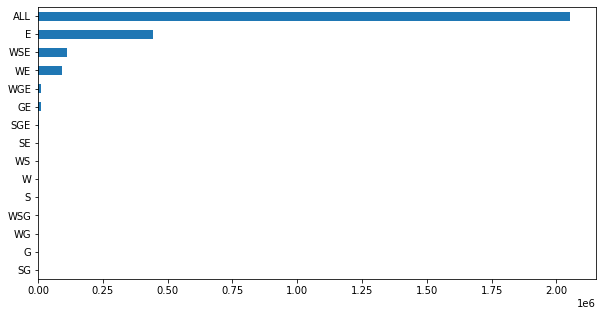

In [9]:
df['utilities'].value_counts().sort_values().plot(kind='barh', figsize=(10,5))

In [14]:
corr_df = df[['total_sale_price', 
              'assessed_building_value', 
              'story_height', 
              'heated_area', 
              'bath', 
              'mort_rate', 
              'unemploy_rate', 
              'pop_growth_rate', 
              'covid_cases', 
              'lumber_price', 
              'metals_price', 
              'build_price',
              'int_rate',
              'manufactured_house_number',
              'hai',
              'wake_supply_index',
              'wake_demand_index']].copy()

<AxesSubplot:>

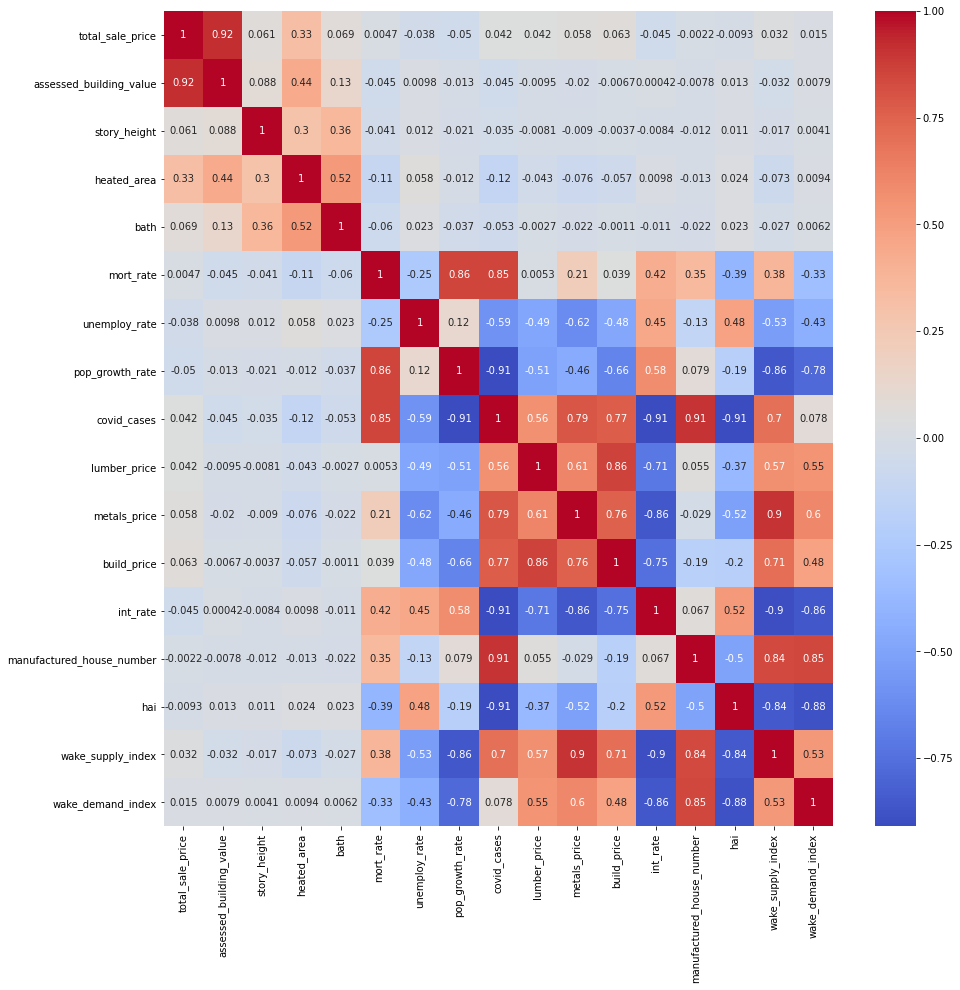

In [16]:
corr = corr_df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, cmap='coolwarm')